Modelo cargado: punt_c_naturales
Modelo cargado: punt_ingles
Modelo cargado: punt_lectura_critica
Modelo cargado: punt_matematicas
Modelo cargado: punt_sociales_ciudadanas
🔎 Top 10 features más importantes en promedio:


,feature,punt_c_naturales,punt_ingles,punt_lectura_critica,punt_matematicas,punt_sociales_ciudadanas,mean_importance
0,cole_bilingue,17.544204,14.672454,15.923662,16.588292,15.535024,16.052727
1,cole_sede_principal,10.264327,11.356107,13.804075,11.010169,11.075384,11.502012
2,fami_estratovivienda,9.640227,11.064773,10.390440,9.817974,10.372968,10.257276
3,fami_personashogar,9.410892,10.198772,9.075114,8.645433,9.244338,9.314910
4,fami_tieneautomovil,8.252298,9.140002,9.025626,8.327760,8.493620,8.647861
5,fami_tienecomputador,7.204647,6.876328,7.018383,7.657200,7.170784,7.185469
6,fami_tieneinternet,6.136889,6.036005,6.508815,6.372316,6.550344,6.320874
7,fami_tienelavadora,5.544759,5.175337,5.224079,5.120645,4.933162,5.199596
8,estu_edad_anios,5.525019,3.682914,4.220689,3.785051,4.290331,4.300801
9,mismo_municipio_prueba,3.056169,3.202599,3.250677,3.551842,3.056557,3.223569


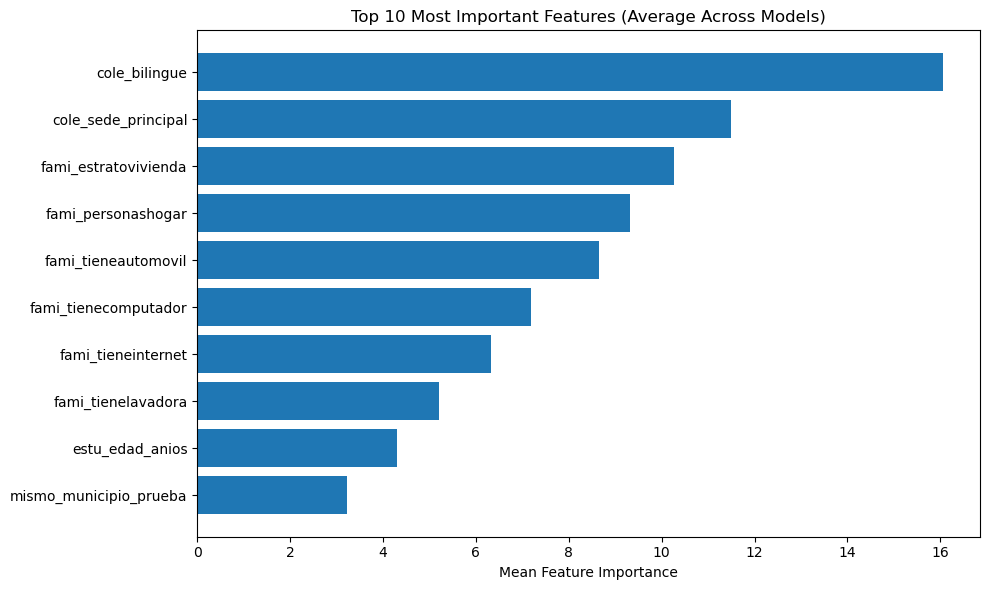

In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# ---------------------------------------------------------
# 1. Cargar modelos y scaler
# ---------------------------------------------------------
ruta_modelos = {
    "punt_c_naturales": "Backend_API/models/modelo_punt_c_naturales.pkl",
    "punt_ingles": "Backend_API/models/modelo_punt_ingles.pkl",
    "punt_lectura_critica": "Backend_API/models/modelo_punt_lectura_critica.pkl",
    "punt_matematicas": "Backend_API/models/modelo_punt_matematicas.pkl",
    "punt_sociales_ciudadanas": "Backend_API/models/modelo_punt_sociales_ciudadanas.pkl",
}

modelos = {}

for nombre, archivo in ruta_modelos.items():
    try:
        modelos[nombre] = joblib.load(archivo)
        print(f"Modelo cargado: {nombre}")
    except Exception as e:
        print(f"❌ Error cargando {nombre}: {e}")

# Cargar scaler
scaler = joblib.load("Backend_API/models/saber11_encoded2_scaler.pkl")
columnas = scaler.feature_names_in_

# ---------------------------------------------------------
# 2. Extraer importancias de cada modelo
# ---------------------------------------------------------
dfs_importancias = {}

for nombre_modelo, modelo in modelos.items():
    importancias = modelo.feature_importances_

    df_imp = pd.DataFrame({
        "feature": columnas,
        "importance": importancias
    }).sort_values("importance", ascending=False)

    dfs_importancias[nombre_modelo] = df_imp

# ---------------------------------------------------------
# 3. Consolidar importancias (promedio entre modelos)
# ---------------------------------------------------------
df_consolidado = pd.DataFrame({"feature": columnas})

for nombre, df_imp in dfs_importancias.items():
    df_consolidado[nombre] = df_imp["importance"].values

df_consolidado["mean_importance"] = df_consolidado[
    list(ruta_modelos.keys())
].mean(axis=1)

df_top10 = df_consolidado.sort_values(
    "mean_importance", ascending=False
).head(10)

print("🔎 Top 10 features más importantes en promedio:")
display(df_top10)

# ---------------------------------------------------------
# 4. ÚNICO PLOT — Importancia promedio de los Top 10
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.barh(df_top10["feature"], df_top10["mean_importance"])
plt.gca().invert_yaxis()
plt.xlabel("Mean Feature Importance")
plt.title("Top 10 Most Important Features (Average Across Models)")
plt.tight_layout()
plt.show()